In [11]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats
import os 
import glob
import math
from geopy.distance import geodesic
from Data_Reading import DataProcessor
from sklearn.linear_model import Ridge


In [12]:
directory_path = "//Users//medinazaganjori//Desktop//Interviews Prep//PMI Interview//cabspottingdata"
data_processor = DataProcessor()
# Call the read_text_files method
contents = data_processor.read_text_files(directory_path)

# Call the list_to_dataframe method
df = data_processor.list_to_dataframe(contents)
df_m = data_processor.manipulate_data(df)
df = data_processor.clear_data(df_m)


In [13]:
df

,latitude,longtitude,occupancy,time,year,month,day,hour,minute,second
0,37.79826,-122.26613,0,2008-05-17 14:25:37,2008.0,5.0,17.0,14.0,25.0,37.0
1,37.79596,-122.26824,0,2008-05-17 14:26:38,2008.0,5.0,17.0,14.0,26.0,38.0
2,37.80031,-122.2792,0,2008-05-17 14:27:47,2008.0,5.0,17.0,14.0,27.0,47.0
3,37.80219,-122.29588,0,2008-05-17 14:28:35,2008.0,5.0,17.0,14.0,28.0,35.0
4,37.81305,-122.30235,0,2008-05-17 14:29:35,2008.0,5.0,17.0,14.0,29.0,35.0
...,...,...,...,...,...,...,...,...,...,...
11220053,37.6173,-122.38471,1,2008-06-09 18:10:21,2008.0,6.0,9.0,18.0,10.0,21.0
11220054,37.61787,-122.38541,1,2008-06-09 18:10:37,2008.0,6.0,9.0,18.0,10.0,37.0
11220055,37.61792,-122.38538,1,2008-06-09 18:11:27,2008.0,6.0,9.0,18.0,11.0,27.0
11220056,37.61792,-122.38538,0,2008-06-09 18:11:29,2008.0,6.0,9.0,18.0,11.0,29.0


In [14]:
df['latitude'] = df['latitude'].astype("float")
df['longtitude'] = df['longtitude'].astype("float")
df['occupancy'] = df['occupancy'].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11220058 entries, 0 to 11220057
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   latitude    float64       
 1   longtitude  float64       
 2   occupancy   float64       
 3   time        datetime64[ns]
 4   year        float64       
 5   month       float64       
 6   day         float64       
 7   hour        float64       
 8   minute      float64       
 9   second      float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 941.6 MB


In [16]:
df.describe()

,latitude,longtitude,occupancy,year,month,day,hour,minute,second
count,1.122006e+07,1.122006e+07,1.122006e+07,11220058.0,1.122006e+07,1.122006e+07,1.122006e+07,1.122006e+07,1.122006e+07
mean,3.776360e+01,-1.224124e+02,4.472238e-01,2008.0,5.382190e+00,1.685492e+01,1.140378e+01,2.954044e+01,2.949546e+01
std,5.385999e-02,3.578201e-02,4.972069e-01,0.0,4.859227e-01,1.003906e+01,7.294970e+00,1.731320e+01,1.732883e+01
min,3.286970e+01,-1.270814e+02,0.000000e+00,2008.0,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.775513e+01,-1.224253e+02,0.000000e+00,2008.0,5.000000e+00,6.000000e+00,5.000000e+00,1.500000e+01,1.400000e+01
50%,3.778106e+01,-1.224111e+02,0.000000e+00,2008.0,5.000000e+00,2.000000e+01,1.200000e+01,3.000000e+01,2.900000e+01
75%,3.779045e+01,-1.224003e+02,1.000000e+00,2008.0,6.000000e+00,2.600000e+01,1.800000e+01,4.500000e+01,4.500000e+01
max,5.030546e+01,-1.155622e+02,1.000000e+00,2008.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


<span style="background-color:yellow;color:green;text-align: center;">Haversine Formula</span>

In [18]:
# Haversine formula
def calculate_distance_haversine(lat1, lon1, lat2, lon2):
    R = 3958.9  # Radius of the Earth in miles
    # Convert latitude and longitude to radians
    lat1_rad = lat1.apply(math.radians)
    lon1_rad = lon1.apply(math.radians)
    lat2_rad = lat2.apply(math.radians)
    lon2_rad = lon2.apply(math.radians)
    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = (dlat/2).apply(math.sin)**2 + (lat1_rad).apply(math.cos) * (lat2_rad.apply(math.cos)) * (dlon/2).apply(math.sin)**2
    c = 2 * (a.apply(math.sqrt)).apply(lambda x: math.atan2(math.sqrt(x), math.sqrt(1-x)))
    distance = R * c 
    return distance

In [19]:
# Calculate distance traveled for each trip using the Haversine formula
# shift() used for consecutive measurements

df_haversine = df.copy(deep=False)

df_haversine['distance_haversine'] = calculate_distance_haversine(df_haversine['latitude'].shift(), df_haversine['longtitude'].shift(), df_haversine['latitude'], df_haversine['longtitude'])

# Filter trips without passengers (occupancy = 0)

df_without_passengers_h = df_haversine[df_haversine['occupancy'] == 0]

# Calculate CO2 emissions for each trip
emission_rate = 404  # grams of CO2 per mile
df_without_passengers_h['emissions'] = df_without_passengers_h['distance_haversine'] * emission_rate

# Calculate total CO2 emissions for all trips
total_emissions = df_without_passengers_h['emissions'].sum()

# Calculate potential yearly reduction in CO2 emissions
monthly_reduction_rate = 0.15
annual_reduction_rate = (1 - monthly_reduction_rate) ** 12  # Compounded over 12 months
potential_reduction = total_emissions * annual_reduction_rate


/var/folders/gh/yrhvl96j183b9_x6z58cxq900000gn/T/ipykernel_24565/2685890208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_passengers_h['emissions'] = df_without_passengers_h['distance_haversine'] * emission_rate


In [20]:
# Print the potential yearly reduction in CO2 emissions
print("Potential yearly reduction in CO2 emissions:", potential_reduction, "grams")

Potential yearly reduction in CO2 emissions: 10450729260.116621 grams


<span style="background-color:yellow;color:green;text-align: center;">Vincenty Formula</span>

In [9]:
def calculate_distance_vincenty(latitudes, longitudes):
    min_length = min(len(latitudes), len(longitudes))
    latitudes = latitudes[:min_length]
    longitudes = longitudes[:min_length]
    coordinates = list(zip(latitudes, longitudes))
    distances = [geodesic(coord1, coord2).miles for coord1, coord2 in zip(coordinates[:-1], coordinates[1:])]
    return distances

In [ ]:
# Calculate distance traveled for each trip using the Vincenty formula

df_vincenty = df.copy(deep=False)
df_vincenty['distance_vincenty'] = calculate_distance_vincenty(df_vincenty['latitude'][:-1], df_vincenty['longtitude'])

# Filter trips without passengers (occupancy = 0)
df_without_passengers_vincenty = df_vincenty[df_vincenty['occupancy'] == 0]

# Calculate CO2 emissions for each trip
emission_rate = 404  # grams of CO2 per mile
df_without_passengers_vincenty['emissions_vincenty'] = df_without_passengers_vincenty['distance_vincenty'] * emission_rate

# Calculate total CO2 emissions for all trips
total_emissions_vincenty = df_without_passengers_vincenty['emissions_vincenty'].sum()

# Calculate potential yearly reduction in CO2 emissions
monthly_reduction_rate = 0.15
annual_reduction_rate = (1 - monthly_reduction_rate) ** 12  # Compounded over 12 months
potential_reduction_vincenty = total_emissions * annual_reduction_rate


In [ ]:
# Print the potential yearly reduction in CO2 emissions
print("Potential yearly reduction in CO2 emissions:", potential_reduction_vincenty, "grams")

<span style="background-color:white;color:green;text-align: center;">Feature Engineering</span>

/var/folders/gh/yrhvl96j183b9_x6z58cxq900000gn/T/ipykernel_24565/3265050145.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


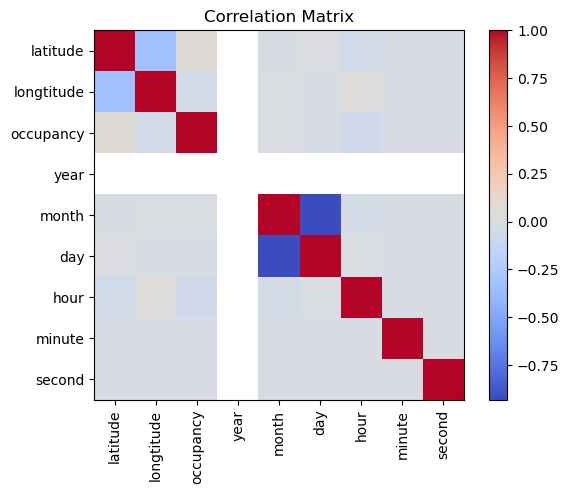

In [21]:
# Correlation matrix
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

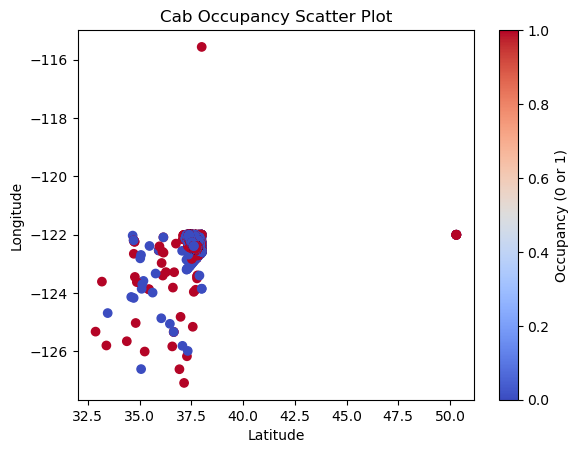

In [22]:
plt.scatter(df['latitude'], df['longtitude'], c=df['occupancy'], cmap='coolwarm')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Cab Occupancy Scatter Plot')
plt.colorbar(label='Occupancy (0 or 1)')
plt.show()

In order to know next location we have to know what was the previous latitude and longitude that we had.
so we have to create two new columns in our data

In [23]:
data = df.copy(deep=False)
data['previous_pickup_latitude'] = data['latitude'].shift()
data['previous_pickup_longitude'] = data['longtitude'].shift()

In [17]:
data

,latitude,longtitude,occupancy,time,year,month,day,hour,minute,second,previous_pickup_latitude,previous_pickup_longitude
0,37.79826,-122.26613,0.0,2008-05-17 14:25:37,2008.0,5.0,17.0,14.0,25.0,37.0,NaN,NaN
1,37.79596,-122.26824,0.0,2008-05-17 14:26:38,2008.0,5.0,17.0,14.0,26.0,38.0,37.79826,-122.26613
2,37.80031,-122.27920,0.0,2008-05-17 14:27:47,2008.0,5.0,17.0,14.0,27.0,47.0,37.79596,-122.26824
3,37.80219,-122.29588,0.0,2008-05-17 14:28:35,2008.0,5.0,17.0,14.0,28.0,35.0,37.80031,-122.27920
4,37.81305,-122.30235,0.0,2008-05-17 14:29:35,2008.0,5.0,17.0,14.0,29.0,35.0,37.80219,-122.29588
...,...,...,...,...,...,...,...,...,...,...,...,...
11220053,37.61730,-122.38471,1.0,2008-06-09 18:10:21,2008.0,6.0,9.0,18.0,10.0,21.0,37.61476,-122.39168
11220054,37.61787,-122.38541,1.0,2008-06-09 18:10:37,2008.0,6.0,9.0,18.0,10.0,37.0,37.61730,-122.38471
11220055,37.61792,-122.38538,1.0,2008-06-09 18:11:27,2008.0,6.0,9.0,18.0,11.0,27.0,37.61787,-122.38541
11220056,37.61792,-122.38538,0.0,2008-06-09 18:11:29,2008.0,6.0,9.0,18.0,11.0,29.0,37.61792,-122.38538


In [24]:
data['distance_since_last_pickup'] = ((data['latitude'] - data['previous_pickup_latitude'])**2 + (data['longtitude'] - data['previous_pickup_longitude'])**2)**0.5

In [19]:
data

,latitude,longtitude,occupancy,time,year,month,day,hour,minute,second,previous_pickup_latitude,previous_pickup_longitude,distance_since_last_pickup
0,37.79826,-122.26613,0.0,2008-05-17 14:25:37,2008.0,5.0,17.0,14.0,25.0,37.0,NaN,NaN,NaN
1,37.79596,-122.26824,0.0,2008-05-17 14:26:38,2008.0,5.0,17.0,14.0,26.0,38.0,37.79826,-122.26613,0.003121
2,37.80031,-122.27920,0.0,2008-05-17 14:27:47,2008.0,5.0,17.0,14.0,27.0,47.0,37.79596,-122.26824,0.011792
3,37.80219,-122.29588,0.0,2008-05-17 14:28:35,2008.0,5.0,17.0,14.0,28.0,35.0,37.80031,-122.27920,0.016786
4,37.81305,-122.30235,0.0,2008-05-17 14:29:35,2008.0,5.0,17.0,14.0,29.0,35.0,37.80219,-122.29588,0.012641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220053,37.61730,-122.38471,1.0,2008-06-09 18:10:21,2008.0,6.0,9.0,18.0,10.0,21.0,37.61476,-122.39168,0.007418
11220054,37.61787,-122.38541,1.0,2008-06-09 18:10:37,2008.0,6.0,9.0,18.0,10.0,37.0,37.61730,-122.38471,0.000903
11220055,37.61792,-122.38538,1.0,2008-06-09 18:11:27,2008.0,6.0,9.0,18.0,11.0,27.0,37.61787,-122.38541,0.000058
11220056,37.61792,-122.38538,0.0,2008-06-09 18:11:29,2008.0,6.0,9.0,18.0,11.0,29.0,37.61792,-122.38538,0.000000


In [25]:
# I will be removing first row of a dataframe since we don't need it anymore
data = data.drop(0)

In [26]:
data

,latitude,longtitude,occupancy,time,year,month,day,hour,minute,second,previous_pickup_latitude,previous_pickup_longitude,distance_since_last_pickup
1,37.79596,-122.26824,0.0,2008-05-17 14:26:38,2008.0,5.0,17.0,14.0,26.0,38.0,37.79826,-122.26613,0.003121
2,37.80031,-122.27920,0.0,2008-05-17 14:27:47,2008.0,5.0,17.0,14.0,27.0,47.0,37.79596,-122.26824,0.011792
3,37.80219,-122.29588,0.0,2008-05-17 14:28:35,2008.0,5.0,17.0,14.0,28.0,35.0,37.80031,-122.27920,0.016786
4,37.81305,-122.30235,0.0,2008-05-17 14:29:35,2008.0,5.0,17.0,14.0,29.0,35.0,37.80219,-122.29588,0.012641
5,37.82369,-122.30235,0.0,2008-05-17 14:30:37,2008.0,5.0,17.0,14.0,30.0,37.0,37.81305,-122.30235,0.010640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220053,37.61730,-122.38471,1.0,2008-06-09 18:10:21,2008.0,6.0,9.0,18.0,10.0,21.0,37.61476,-122.39168,0.007418
11220054,37.61787,-122.38541,1.0,2008-06-09 18:10:37,2008.0,6.0,9.0,18.0,10.0,37.0,37.61730,-122.38471,0.000903
11220055,37.61792,-122.38538,1.0,2008-06-09 18:11:27,2008.0,6.0,9.0,18.0,11.0,27.0,37.61787,-122.38541,0.000058
11220056,37.61792,-122.38538,0.0,2008-06-09 18:11:29,2008.0,6.0,9.0,18.0,11.0,29.0,37.61792,-122.38538,0.000000


In [27]:
data.columns

Index(['latitude', 'longtitude', 'occupancy', 'time', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'previous_pickup_latitude',
       'previous_pickup_longitude', 'distance_since_last_pickup'],
      dtype='object')

/var/folders/gh/yrhvl96j183b9_x6z58cxq900000gn/T/ipykernel_24565/3699233205.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


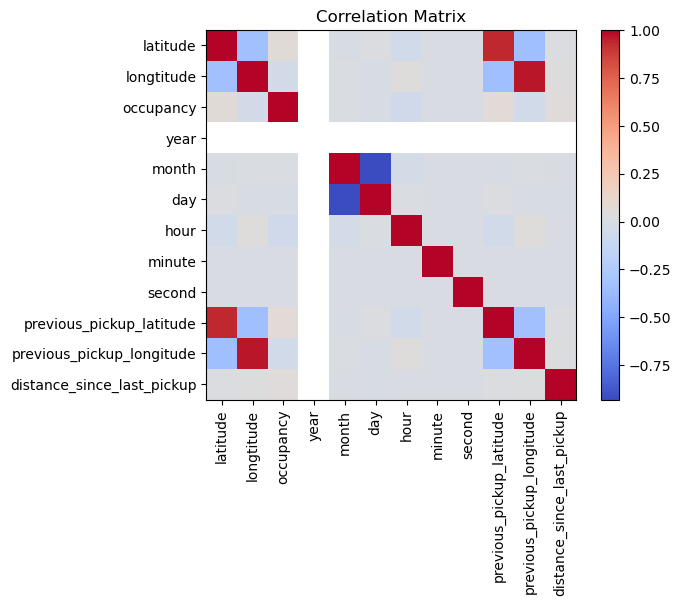

In [28]:
# Correlation matrix
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [23]:
data

,latitude,longtitude,occupancy,time,year,month,day,hour,minute,second,previous_pickup_latitude,previous_pickup_longitude,distance_since_last_pickup
1,37.79596,-122.26824,0.0,2008-05-17 14:26:38,2008.0,5.0,17.0,14.0,26.0,38.0,37.79826,-122.26613,0.003121
2,37.80031,-122.27920,0.0,2008-05-17 14:27:47,2008.0,5.0,17.0,14.0,27.0,47.0,37.79596,-122.26824,0.011792
3,37.80219,-122.29588,0.0,2008-05-17 14:28:35,2008.0,5.0,17.0,14.0,28.0,35.0,37.80031,-122.27920,0.016786
4,37.81305,-122.30235,0.0,2008-05-17 14:29:35,2008.0,5.0,17.0,14.0,29.0,35.0,37.80219,-122.29588,0.012641
5,37.82369,-122.30235,0.0,2008-05-17 14:30:37,2008.0,5.0,17.0,14.0,30.0,37.0,37.81305,-122.30235,0.010640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220053,37.61730,-122.38471,1.0,2008-06-09 18:10:21,2008.0,6.0,9.0,18.0,10.0,21.0,37.61476,-122.39168,0.007418
11220054,37.61787,-122.38541,1.0,2008-06-09 18:10:37,2008.0,6.0,9.0,18.0,10.0,37.0,37.61730,-122.38471,0.000903
11220055,37.61792,-122.38538,1.0,2008-06-09 18:11:27,2008.0,6.0,9.0,18.0,11.0,27.0,37.61787,-122.38541,0.000058
11220056,37.61792,-122.38538,0.0,2008-06-09 18:11:29,2008.0,6.0,9.0,18.0,11.0,29.0,37.61792,-122.38538,0.000000


In [29]:
X = data[['occupancy', 'year', 'month', 'day', 'hour', 'minute', 'second', 'previous_pickup_latitude', 'previous_pickup_longitude', 'distance_since_last_pickup']]
y = data[['latitude', 'longtitude']]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

A low MSE suggests that the model is performing well in terms of prediction accuracy.

In [32]:
#Evaluation metrics:

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 0.00042863351027426857
Root Mean Squared Error: 0.020703466141549064
R-squared Score: 0.8237838318783962
Explained Variance Score: 0.8237841855317403


Test different Hyper-Parameters 

In [33]:
alpha_values = [0.05, 0.1, 0.5, 1.0, 2.0]

for alpha in alpha_values:
    # Create a new Ridge regression model with the specified alpha
    model_Ridge = Ridge(alpha=alpha)

    # Train the model
    model_Ridge.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    print(f"Alpha: {alpha}, MSE: {mse}")
    print(f"Alpha: {alpha}, RMSE: {rmse}")
    print(f"Alpha: {alpha}, R2: {r2}")
    print(f"Alpha: {alpha}, Explained Variance: {explained_variance}")
    
    

Alpha: 0.05, MSE: 0.00042863351027426857
Alpha: 0.05, RMSE: 0.020703466141549064
Alpha: 0.05, R2: 0.8237838318783962
Alpha: 0.05, Explained Variance: 0.8237841855317403
Alpha: 0.1, MSE: 0.00042863351027426857
Alpha: 0.1, RMSE: 0.020703466141549064
Alpha: 0.1, R2: 0.8237838318783962
Alpha: 0.1, Explained Variance: 0.8237841855317403
Alpha: 0.5, MSE: 0.00042863351027426857
Alpha: 0.5, RMSE: 0.020703466141549064
Alpha: 0.5, R2: 0.8237838318783962
Alpha: 0.5, Explained Variance: 0.8237841855317403
Alpha: 1.0, MSE: 0.00042863351027426857
Alpha: 1.0, RMSE: 0.020703466141549064
Alpha: 1.0, R2: 0.8237838318783962
Alpha: 1.0, Explained Variance: 0.8237841855317403
Alpha: 2.0, MSE: 0.00042863351027426857
Alpha: 2.0, RMSE: 0.020703466141549064
Alpha: 2.0, R2: 0.8237838318783962
Alpha: 2.0, Explained Variance: 0.8237841855317403


In [32]:
data.columns

Index(['latitude', 'longtitude', 'occupancy', 'time', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'previous_pickup_latitude',
       'previous_pickup_longitude', 'distance_since_last_pickup'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11220057 entries, 1 to 11220057
Data columns (total 13 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   latitude                    float64       
 1   longtitude                  float64       
 2   occupancy                   float64       
 3   time                        datetime64[ns]
 4   year                        float64       
 5   month                       float64       
 6   day                         float64       
 7   hour                        float64       
 8   minute                      float64       
 9   second                      float64       
 10  previous_pickup_latitude    float64       
 11  previous_pickup_longitude   float64       
 12  distance_since_last_pickup  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1.2 GB


In [34]:
data_ = data.drop('time', axis=1)

<span style="background-color:yellow;color:green;text-align: center;">K-Means Clustering</span>

In [35]:
import numpy as np
from sklearn.cluster import KMeans

selected_data = data_.copy()

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(selected_data)

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

for cluster in range(num_clusters):
    print(f"Cluster {cluster} - Center: {cluster_centers[cluster]}")
    cluster_data = selected_data[cluster_labels == cluster]
    print("Data points in this cluster:")
    print(cluster_data)
    print("")



/Users/medinazaganjori/anaconda3/envs/medina_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 - Center: [ 3.77635312e+01 -1.22412460e+02  4.49312008e-01  2.00800000e+03
  5.36085300e+00  1.72101110e+01  1.14081573e+01  4.46590960e+01
  1.29365901e+01  3.77635238e+01 -1.22412464e+02  4.12033162e-03]
Data points in this cluster:
          latitude  longtitude  occupancy    year  month   day  hour  minute  \
9         37.82517  -122.31362        0.0  2008.0    5.0  17.0  14.0    34.0   
10        37.82400  -122.31847        0.0  2008.0    5.0  17.0  14.0    35.0   
11        37.82065  -122.33455        0.0  2008.0    5.0  17.0  14.0    36.0   
12        37.81713  -122.34988        0.0  2008.0    5.0  17.0  14.0    37.0   
13        37.81052  -122.36463        0.0  2008.0    5.0  17.0  14.0    38.0   
...            ...         ...        ...     ...    ...   ...   ...     ...   
11219967  37.78680  -122.40236        0.0  2008.0    6.0   9.0  16.0    48.0   
11220027  37.74532  -122.45203        0.0  2008.0    6.0   9.0  17.0    47.0   
11220028  37.74679  -122.44525     

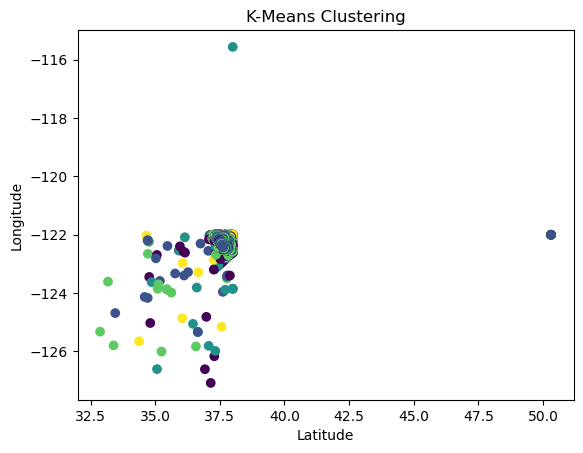

In [36]:
import matplotlib.pyplot as plt

x = selected_data['latitude']
y = selected_data['longtitude']

plt.scatter(x, y, c=cluster_labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.show()


In [37]:
print("Inertia:", kmeans.inertia_)

Inertia: 3129120971.052279


/Users/medinazaganjori/anaconda3/envs/medina_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/medinazaganjori/anaconda3/envs/medina_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/medinazaganjori/anaconda3/envs/medina_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/medinazaganjori/anaconda3/envs/medina_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

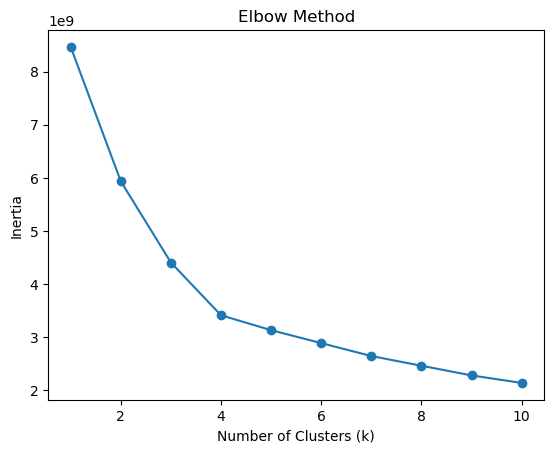

In [38]:
import matplotlib.pyplot as plt

inertia_values = []
k_values = range(1, 11)  #range of cluster numbers to evaluate

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [39]:
import numpy as np
from sklearn.cluster import KMeans

selected_data = data_.copy()
num_clusters = 11

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(selected_data)

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

/Users/medinazaganjori/anaconda3/envs/medina_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


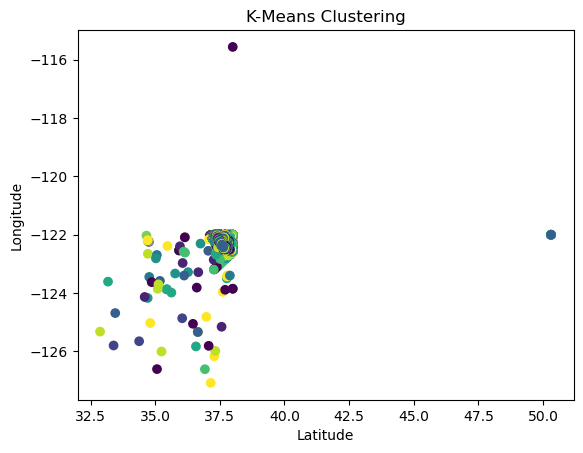

In [40]:
import matplotlib.pyplot as plt

x = selected_data['latitude']
y = selected_data['longtitude']

plt.scatter(x, y, c=cluster_labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.show()


DBSCAN

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5) 
cluster_labels = dbscan.fit_predict(scaled_data)

# Visualize the clusters
sns.scatterplot(x='latitude', y='longitude', hue=cluster_labels, data=scaled_data)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering')
plt.show()
